# Comparing Genre against Average Rating

#### Importing Libraries

Importing various libraries that we'll be looking to use throughout the data cleaning and visualization process for the IMDB datasets. We also will look to assign all datasets to variables and open with Pandas' dataframes to interpret this data more easily.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# This was very helpful in pulling in all the IMDB datasets without having to
# refer back to the project information.

!ls zippedData

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [39]:
# Opening up all the datasets related to the IMDB data provided as dataframes 
# with the use of pandas

df_tb = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_tr = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df_tc = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df_ta = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df_tp = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df_nb = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

# After looking at the various heads of each dataset, it was apparent that we could use
# the title.basics and title.ratings files to come up with a average rating by genre.

# We could have joined additional tables however we didn't see the need to come
# up with a conclusion that we'd be able to provide to Microsoft.

df_combined = df_tb.join(df_tr, how='inner', lsuffix='_tb')
df_combined.head()

# An inner join made most since on the 'tconst' column, which was the index in both 
# tables as it seemed to be an unique identifier for individual movies in IMDB data.

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt10356526,8.3,31
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt1042974,6.4,20
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt1060240,6.5,21


## Cleaning Up the Data

Before we start to look drawing conclusions from the data, we need to make sure we remove any NaN/"not a number" values within the data sets. We can quickly check this by running the df.info() to see how many values we have in each column and then decide how we want to take action.

In [40]:
print(df_combined.info())

print(df_combined.isna().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst_tb        73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73853 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  61529 non-null  float64
 5   genres           72066 non-null  object 
 6   tconst           73856 non-null  object 
 7   averagerating    73856 non-null  float64
 8   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB
None
tconst_tb          False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
tconst             False
averagerating      False
numvotes           False
dtype: bool


Unfortunately, we have 3 columns within our combined data set that are missing values. We should look to deal with these values so that our data set is totally clean. As we can see from the second table above, we're missing data or have NaN values in: Original_Title, runtime_minutes & genres.

For the sake of our comparison here between Genre and Average rating, we're not concerned with the missing data in the original_title or runtime_minutes. 

Genre - It doesn't look like there is a way to grab this information for the missing values so we'll look to drop the ~1.3k records where the movie doesn't have a genre. It's roughly 2% of the entire data set so removing these records should impact our conclusion minimally if at all.

## Cleaning Up Genres


In [41]:
## Looking to drop any of the valeus in our dataframe where genre was entirely blank.

df_combined.dropna(subset=['genres'], inplace=True)

# We can then check the new dataframe to ensure that we're no
# longer missing values in the genres column.

df_combined.isna().any()

tconst_tb          False
primary_title      False
original_title     False
start_year         False
runtime_minutes     True
genres             False
tconst             False
averagerating      False
numvotes           False
dtype: bool

In [47]:
# It also looks like there are a number of movies with a very small amount of votes,
# so we'll make the assumption to remove anything with less than 100 votes
# to avoid some type of skewness of average rating.

df_combined = df_combined[(df_combined['numvotes'] > 100)]
df_combined.head(10)

,tconst_tb,primary_title,original_title,start_year,runtime_minutes,genres,tconst,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt10384606,8.9,559
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt1043726,4.2,50352
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,tt1069246,6.2,326
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt1094666,7.0,1613
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt1130982,6.4,571
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",tt1156528,7.2,265
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,tt1161457,4.2,148
10,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,tt1171222,5.1,8296
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,tt1174693,5.8,2381
12,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,tt1181840,7.0,5494


Now that we have a clean list of genres, we should now see what are all the unique genre values within the column, not taking into account the different permutations such as Comedy, Drama and Drama, Horror. I'd expect there to be 3 unique values: Comedy, Drama and Horror.

In [48]:
genre_list_total = []
unique_gen = []
total_genre = []

gen_unique = list((df_combined['genres'])) 
# Creating a list of the column from our dataframe

for genre in gen_unique:
    genre_list_total.append(genre.split(","))
    
# Then using that list we created to create a better organized list
# of lists of each movie's unique genres

for x in genre_list_total:
    total_genre = total_genre + x

# We then wanted to find out a list of the total unique genres in
# order to create a dictionary of keys of each genre and values of the mean
# of each average mean
    
unique_gen = list(set(total_genre))
unique_gen

['Mystery',
 'Comedy',
 'Animation',
 'Talk-Show',
 'Reality-TV',
 'Adventure',
 'Biography',
 'Thriller',
 'Musical',
 'War',
 'Documentary',
 'Sport',
 'Crime',
 'Sci-Fi',
 'Family',
 'Adult',
 'Drama',
 'Short',
 'News',
 'Horror',
 'History',
 'Fantasy',
 'Western',
 'Action',
 'Music',
 'Romance',
 'Game-Show']

In [49]:
ratings = {}

for x in unique_gen:
    y = df_combined[df_combined['genres'].str.contains(x)].mean().values[2]
    ratings[x]= y
    
df_ratings = pd.DataFrame.from_dict(ratings, orient='index')
df_ratings = df_ratings.reset_index()
df_ratings = df_ratings.sort_values(([0]), ascending=False)
df_ratings

,index,0
17,Short,6.100000
18,News,5.981018
21,Fantasy,5.965365
5,Adventure,5.962958
23,Action,5.925929
10,Documentary,5.920602
16,Drama,5.916470
25,Romance,5.909881
19,Horror,5.907280
14,Family,5.905660


It's clear that we have some 'genres' included in the IMDB movie data that are more closely aligned with TV shows. Some of this data would be: Talk-show, News, Reality-TV, Game-Show. 

Indices of Talk-Show (3), News (18), Reality-TV (4), Short (17) and Game-show (26).

In [52]:
df_only_movies = df_ratings.drop([3, 18, 4, 17, 26])

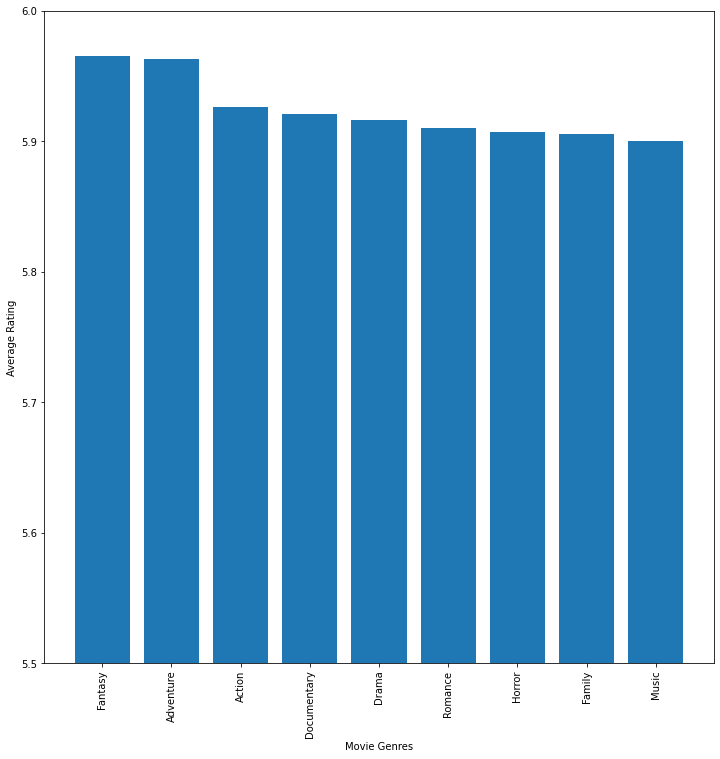

In [55]:
genre_ratings, ax = plt.subplots(figsize =(12,12))

abcd = df_only_movies['index'][:9]
defg = df_only_movies[0][:9]
ax.set_ylim(5.5, 6)
plt.xticks(rotation=90)
ax.bar(abcd, defg)
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Average Rating');


# Conclusion